# Hyper Tuning  notebook

### • The aim of this notebook In case of any overfitting happens we will move to hyper tuning phase and apply some feature selection see which redunant features and which is more important

### • We need to upgrade performance of our model beacause previous scores are not satisfying 

### • after we got new features  we will apply grid search to upgrade performance more 


## we work with agile SDLC so we can get back again to any phase adding more features without affecting the old phases

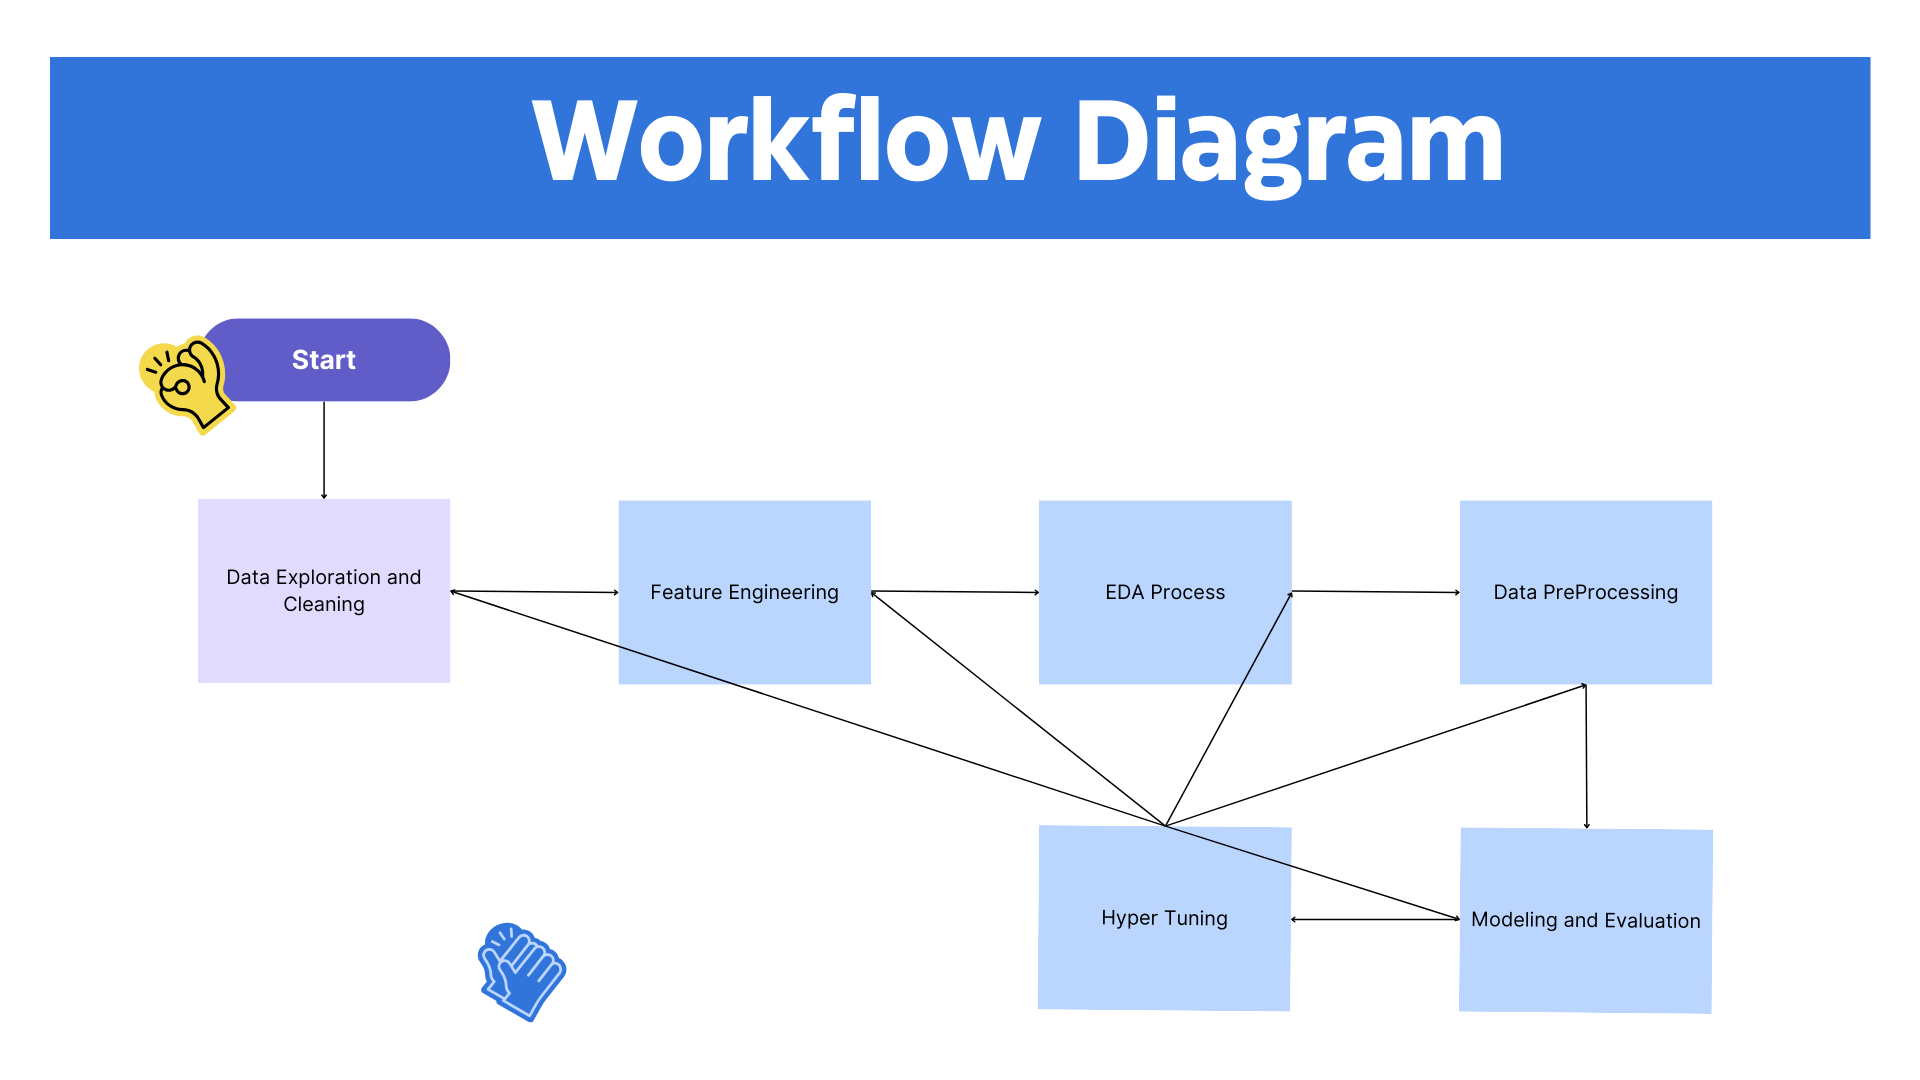




## import libraries that is going to be used in our project 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
import random
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from iso639 import languages
import user_agents
#from ip2geotools.databases.noncommercial import DbIpCity as ip2geo
import requests
import json
#from geopy.distance import great_circle
#from geopy.geocoders import Nominatim
from datasist.structdata import detect_outliers
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder 
from datetime import datetime
from sklearn.model_selection import train_test_split , cross_validate
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE , RandomOverSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import r2_score , mean_squared_error , classification_report ,recall_score , precision_score , ConfusionMatrixDisplay , confusion_matrix
from sklearn.linear_model import Ridge , Lasso
from sklearn.tree import DecisionTreeRegressor , DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor , RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB , GaussianNB , BernoulliNB
from sklearn.svm import SVC , SVR
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier
import xgboost as xgb
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
import pickle
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN
from sklearn.decomposition import PCA
%matplotlib inline
from imblearn.base import _ParamsValidationMixin

#### as we see that is max score we got 76 % at most and even if we apply more hyper turning we wonot get better than this

#### so what is the solution ?as we mentioned earlier we have noticed that scores go down when we apply dimensionality reduction every feature is important and this scenario leads to add more features to imporove the perfromance and accuracy number of the preferred model

## restore the erased featured and go with the process from cleaning to hadling outliers then encoding 

## modeling again and see our new scores

#### gather all dropped data from cleaning phase and feature engineering phase

## restore from cleaning phase

### apply the same previous phases on other features (cleaning,feature enigneering,EDA,preprocessing data,Modeling and feature selection)

In [2]:
raw_data=pd.read_csv('../data/interim/train.csv')
df=raw_data.copy()
df.head()

ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     Credit_History_Age  \
0            809.98                26.822620  22 Years and 1 Months   
1            809.98                31.944960                    NaN   
2            809.98                28.609352  22 Years and 3 Months   
3            809.98                31.377862  22 Years and 4 Months   
4            809.98                24.797347  22 Years and 5 Months   

   Payment_of_Min_Amount Total_EMI_per_month Amount_invested_monthly  \
0                     No           49.574949       80.41529543900253   
1                     No           49.574949      118.28022162236736   
2                     No           49.574949         81.699521264648   
3                     No           49.574949       199.4580743910713   
4                     No           49.574949      41.420153086217326   

                  Payment_Behaviour     Monthly_Balance Credit_Score  
0   High_spent_Small_value_payments  312.49408867943663         Good  
1    Low_spent_Large_value_payments  284.62916249607184         Good  
2   Low_spent_Medium_value_payments   331.2098628537912         Good  
3    Low_spent_Small_value_payments  223.45130972736786         Good  
4  High_spent_Medium_value_payments  341.48923103222177         Good  

[5 rows x 28 columns]

In [3]:
#rename columns regrading to the standards
df.columns=df.columns.str.lower().str.strip().str.replace(" ","_")
df.columns

Index(['id', 'customer_id', 'month', 'name', 'age', 'ssn', 'occupation',
       'annual_income', 'monthly_inhand_salary', 'num_bank_accounts',
       'num_credit_card', 'interest_rate', 'num_of_loan', 'type_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'credit_mix', 'outstanding_debt',
       'credit_utilization_ratio', 'credit_history_age',
       'payment_of_min_amount', 'total_emi_per_month',
       'amount_invested_monthly', 'payment_behaviour', 'monthly_balance',
       'credit_score'],
      dtype='object')

In [4]:
lst_drop=['id', 'customer_id', 'month', 'name',  'ssn', 'occupation',
       'num_bank_accounts',
       'num_credit_card',  'type_of_loan',
       'changed_credit_limit']
df=df[lst_drop]
df

id customer_id     month           name          ssn occupation  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh  821-00-0265  Scientist   
1       0x1603   CUS_0xd40  February  Aaron Maashoh  821-00-0265  Scientist   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  821-00-0265  Scientist   
3       0x1605   CUS_0xd40     April  Aaron Maashoh  821-00-0265  Scientist   
4       0x1606   CUS_0xd40       May  Aaron Maashoh  821-00-0265  Scientist   
...        ...         ...       ...            ...          ...        ...   
99995  0x25fe9  CUS_0x942c     April          Nicks  078-73-5990   Mechanic   
99996  0x25fea  CUS_0x942c       May          Nicks  078-73-5990   Mechanic   
99997  0x25feb  CUS_0x942c      June          Nicks  078-73-5990   Mechanic   
99998  0x25fec  CUS_0x942c      July          Nicks  078-73-5990   Mechanic   
99999  0x25fed  CUS_0x942c    August          Nicks  078-73-5990   Mechanic   

       num_bank_accounts  num_credit_card  \
0                      3                4   
1                      3                4   
2                      3                4   
3                      3                4   
4                      3                4   
...                  ...              ...   
99995                  4                6   
99996                  4                6   
99997                  4                6   
99998                  4                6   
99999                  4                6   

                                            type_of_loan changed_credit_limit  
0      Auto Loan, Credit-Builder Loan, Personal Loan,...                11.27  
1      Auto Loan, Credit-Builder Loan, Personal Loan,...                11.27  
2      Auto Loan, Credit-Builder Loan, Personal Loan,...                    _  
3      Auto Loan, Credit-Builder Loan, Personal Loan,...                 6.27  
4      Auto Loan, Credit-Builder Loan, Personal Loan,...                11.27  
...                                                  ...                  ...  
99995                        Auto Loan, and Student Loan                 11.5  
99996                        Auto Loan, and Student Loan                 11.5  
99997                        Auto Loan, and Student Loan                 11.5  
99998                        Auto Loan, and Student Loan                 11.5  
99999                        Auto Loan, and Student Loan                 11.5  

[100000 rows x 10 columns]

In [5]:
#restore from feature engineering phase
df_1=pd.read_csv('../data/processed/eda_df.csv')
df_1.head()

Unnamed: 0  age  annual_income  monthly_inhand_salary  interest_rate  \
0           0   23        19114.0            1824.843333              3   
1           1   23        19114.0               0.000000              3   
2           2   33        19114.0               0.000000              3   
3           3   23        19114.0               0.000000              3   
4           4   23        19114.0            1824.843333              3   

   num_of_loan  delay_from_due_date  num_of_delayed_payment  \
0            4                    3                       7   
1            4                   18                      13   
2            4                    3                       7   
3            4                    5                       4   
4            4                    6                      13   

   num_credit_inquiries credit_mix  ...  credit_utilization_ratio  \
0                   4.0          _  ...                 26.822620   
1                   4.0       Good  ...                 31.944960   
2                   4.0       Good  ...                 28.609352   
3                   4.0       Good  ...                 31.377862   
4                   4.0       Good  ...                 24.797347   

   payment_of_min_amount total_emi_per_month  amount_invested_monthly  \
0                     No           49.574949                       80   
1                     No           49.574949                      118   
2                     No           49.574949                       81   
3                     No           49.574949                      199   
4                     No           49.574949                       41   

                  payment_behaviour monthly_balance  credit_score  \
0   High_spent_Small_value_payments             312          Good   
1    Low_spent_Large_value_payments             284          Good   
2   Low_spent_Medium_value_payments             331          Good   
3    Low_spent_Small_value_payments             223          Good   
4  High_spent_Medium_value_payments             341          Good   

  credit_history_year  credit_history_month  age_group  
0                  22                     1      18-28  
1                   0                     0      18-28  
2                  22                     3      28-38  
3                  22                     4      18-28  
4                  22                     5      18-28  

[5 rows x 21 columns]

In [6]:
df_1=df_1['monthly_inhand_salary']
df_1

0        1824.843333
1           0.000000
2           0.000000
3           0.000000
4        1824.843333
            ...     
99995    3359.415833
99996    3359.415833
99997    3359.415833
99998    3359.415833
99999    3359.415833
Name: monthly_inhand_salary, Length: 100000, dtype: float64

In [7]:
#merge one and two together
df=pd.concat([df,df_1],axis=1)
df

id customer_id     month           name          ssn occupation  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh  821-00-0265  Scientist   
1       0x1603   CUS_0xd40  February  Aaron Maashoh  821-00-0265  Scientist   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  821-00-0265  Scientist   
3       0x1605   CUS_0xd40     April  Aaron Maashoh  821-00-0265  Scientist   
4       0x1606   CUS_0xd40       May  Aaron Maashoh  821-00-0265  Scientist   
...        ...         ...       ...            ...          ...        ...   
99995  0x25fe9  CUS_0x942c     April          Nicks  078-73-5990   Mechanic   
99996  0x25fea  CUS_0x942c       May          Nicks  078-73-5990   Mechanic   
99997  0x25feb  CUS_0x942c      June          Nicks  078-73-5990   Mechanic   
99998  0x25fec  CUS_0x942c      July          Nicks  078-73-5990   Mechanic   
99999  0x25fed  CUS_0x942c    August          Nicks  078-73-5990   Mechanic   

       num_bank_accounts  num_credit_card  \
0                      3                4   
1                      3                4   
2                      3                4   
3                      3                4   
4                      3                4   
...                  ...              ...   
99995                  4                6   
99996                  4                6   
99997                  4                6   
99998                  4                6   
99999                  4                6   

                                            type_of_loan changed_credit_limit  \
0      Auto Loan, Credit-Builder Loan, Personal Loan,...                11.27   
1      Auto Loan, Credit-Builder Loan, Personal Loan,...                11.27   
2      Auto Loan, Credit-Builder Loan, Personal Loan,...                    _   
3      Auto Loan, Credit-Builder Loan, Personal Loan,...                 6.27   
4      Auto Loan, Credit-Builder Loan, Personal Loan,...                11.27   
...                                                  ...                  ...   
99995                        Auto Loan, and Student Loan                 11.5   
99996                        Auto Loan, and Student Loan                 11.5   
99997                        Auto Loan, and Student Loan                 11.5   
99998                        Auto Loan, and Student Loan                 11.5   
99999                        Auto Loan, and Student Loan                 11.5   

       monthly_inhand_salary  
0                1824.843333  
1                   0.000000  
2                   0.000000  
3                   0.000000  
4                1824.843333  
...                      ...  
99995            3359.415833  
99996            3359.415833  
99997            3359.415833  
99998            3359.415833  
99999            3359.415833  

[100000 rows x 11 columns]

In [8]:
#check missing value
#there is  missing value needed to be handled
missing_df=pd.DataFrame(index=df.isna().sum().index ,data=np.around(df.isna().sum() / len(df_1) *100,2))
missing_df=missing_df.rename(columns = {0:'missing_values %'})
missing_df

missing_values %
id                                 0.00
customer_id                        0.00
month                              0.00
name                               9.98
ssn                                0.00
occupation                         0.00
num_bank_accounts                  0.00
num_credit_card                    0.00
type_of_loan                      11.41
changed_credit_limit               0.00
monthly_inhand_salary              0.00

In [9]:
#display the columns with  missing values only with thier names
missing_df[missing_df['missing_values %'] > 0]

missing_values %
name                      9.98
type_of_loan             11.41

In [10]:
#because no more than 60 % threshold of missing values of columns , no need to drop any one of them

In [11]:
#chech data types of columns
df.dtypes

id                        object
customer_id               object
month                     object
name                      object
ssn                       object
occupation                object
num_bank_accounts          int64
num_credit_card            int64
type_of_loan              object
changed_credit_limit      object
monthly_inhand_salary    float64
dtype: object

In [12]:
#check general information of data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     100000 non-null  object 
 1   customer_id            100000 non-null  object 
 2   month                  100000 non-null  object 
 3   name                   90015 non-null   object 
 4   ssn                    100000 non-null  object 
 5   occupation             100000 non-null  object 
 6   num_bank_accounts      100000 non-null  int64  
 7   num_credit_card        100000 non-null  int64  
 8   type_of_loan           88592 non-null   object 
 9   changed_credit_limit   100000 non-null  object 
 10  monthly_inhand_salary  100000 non-null  float64
dtypes: float64(1), int64(2), object(8)
memory usage: 8.4+ MB


In [13]:
#month column
#convert string names of months to numerical value
#convert it into data data type then to int nuemrical value
df['month']=pd.to_datetime(df['month'],format="%B").dt.month.astype(int)

In [14]:
df['month']

0        1
1        2
2        3
3        4
4        5
        ..
99995    4
99996    5
99997    6
99998    7
99999    8
Name: month, Length: 100000, dtype: int32

In [15]:
#name column
#fill na values of name column with most frequent name
df['name']=df['name'].fillna(df['name'].mode()[0])
df['name'].isnull().sum()

0

In [16]:
df['name']

0        Aaron Maashoh
1        Aaron Maashoh
2        Aaron Maashoh
3        Aaron Maashoh
4        Aaron Maashoh
             ...      
99995            Nicks
99996            Nicks
99997            Nicks
99998            Nicks
99999            Nicks
Name: name, Length: 100000, dtype: object

In [17]:
#ssn column
#we have noticed that every ssn associated with customer id and there is one special case for ssn to be replace with 000-00-0000
#create dictiopnary to map customer id to ssn
#dropna in case there are na values
ssn_mapping = df.dropna(subset=['ssn']).set_index('customer_id')['ssn'].to_dict()
#apply map using get function to associate key with value of dictionary
df['ssn'] = df.apply(lambda row: ssn_mapping.get(row['customer_id'], row['ssn']), axis=1)
#convert ssn to numerical value
def edit_ssn(x):
    #special case
    if x == '#F%$D@*&8':
        x='000-00-0000'
        return int(''.join(x.split('-')))
    else :
        #convert string to integer value
        return int(''.join(x.split('-')))
df['ssn']=df['ssn'].apply(edit_ssn)
df['ssn']

0               0
1               0
2               0
3               0
4               0
           ...   
99995    78735990
99996    78735990
99997    78735990
99998    78735990
99999    78735990
Name: ssn, Length: 100000, dtype: int64

In [18]:
#occupation column
#create dictiopnary to map customer id to occupation
#dropna in case there are na values
occupation_mapping = df.dropna(subset=['occupation']).set_index('customer_id')['occupation'].to_dict()
#apply map using get function to associate key with value of dictionary
df['occupation'] = df.apply(lambda row: occupation_mapping.get(row['customer_id'], row['occupation']), axis=1)

In [19]:
#type_of_loan column
#fill na values with 'unknown' string
df['type_of_loan']=df['type_of_loan'].fillna('unknown')

In [20]:
#check general information of data frame after applying cleaning and some feature engineering
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     100000 non-null  object 
 1   customer_id            100000 non-null  object 
 2   month                  100000 non-null  int32  
 3   name                   100000 non-null  object 
 4   ssn                    100000 non-null  int64  
 5   occupation             100000 non-null  object 
 6   num_bank_accounts      100000 non-null  int64  
 7   num_credit_card        100000 non-null  int64  
 8   type_of_loan           100000 non-null  object 
 9   changed_credit_limit   100000 non-null  object 
 10  monthly_inhand_salary  100000 non-null  float64
dtypes: float64(1), int32(1), int64(3), object(6)
memory usage: 8.0+ MB


In [21]:
#check duplicates
df.duplicated().sum()

0

In [22]:
#no na values or duplicates has been left

In [23]:
#apply EDA for this df
#also detect and handle outliers 
#collect all numerical features
lst_num=df.select_dtypes('number').columns
lst_num

Index(['month', 'ssn', 'num_bank_accounts', 'num_credit_card',
       'monthly_inhand_salary'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

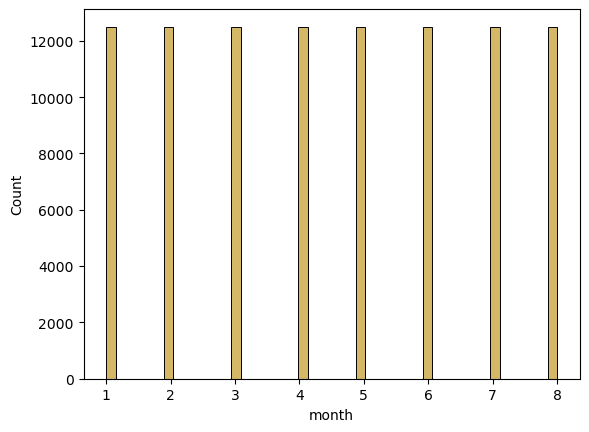

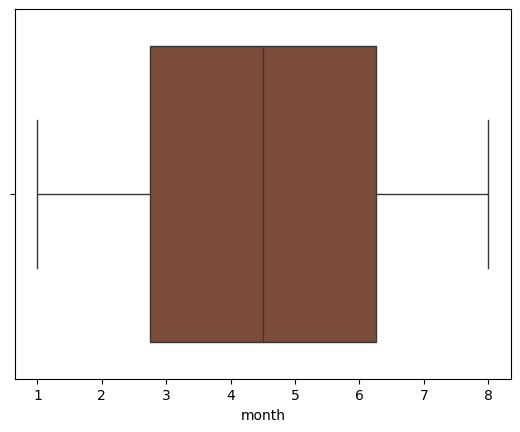

<Figure size 640x480 with 0 Axes>

In [24]:
#month column 
sns.histplot(x=df[lst_num[0]],color=np.random.rand(3,))
plt.figure()
sns.boxplot(x=df[lst_num[0]],color=np.random.rand(3,))
plt.figure()

In [25]:
#there are no outliers here

<Figure size 640x480 with 0 Axes>

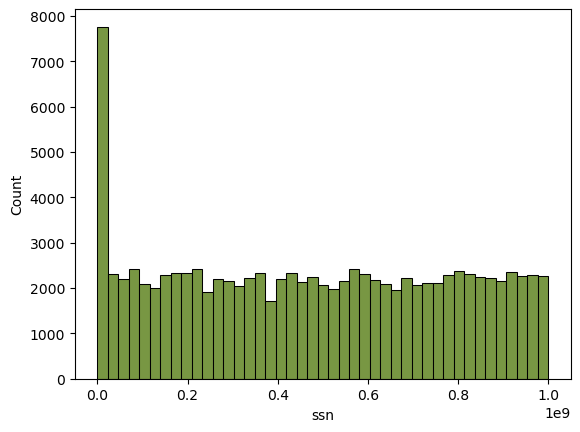

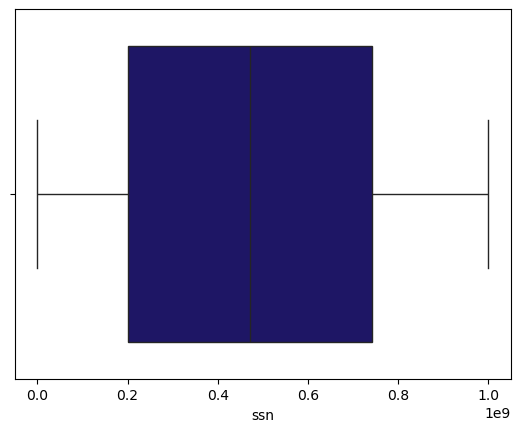

<Figure size 640x480 with 0 Axes>

In [26]:
#ssn column
sns.histplot(x=df[lst_num[1]],color=np.random.rand(3,))
plt.figure()
sns.boxplot(x=df[lst_num[1]],color=np.random.rand(3,))
plt.figure()

In [27]:
#there are no outliers here

<Figure size 640x480 with 0 Axes>

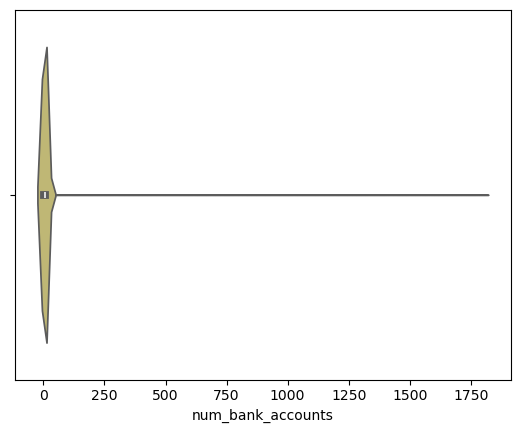

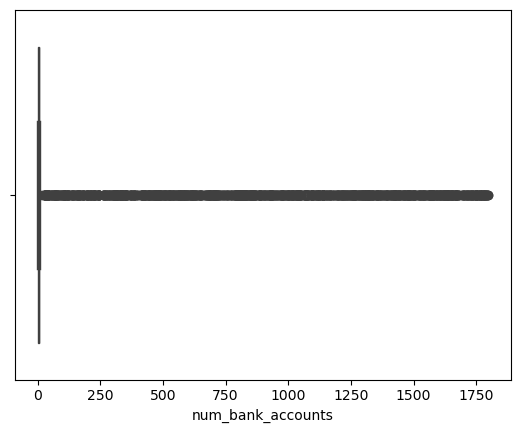

<Figure size 640x480 with 0 Axes>

In [28]:
#num_bank_accounts column
#we will use violin beacuse too much special varaibles
sns.violinplot(x=df[lst_num[2]],color=np.random.rand(3,))
plt.figure()
sns.boxplot(x=df[lst_num[2]],color=np.random.rand(3,))
plt.figure()

In [29]:
#apply descriptive statistics to this column first so we can apply outlier filter 
#make range from q1 to q2 (75%)
df['num_bank_accounts'].describe()

count    100000.000000
mean         17.091280
std         117.404834
min          -1.000000
25%           3.000000
50%           6.000000
75%           7.000000
max        1798.000000
Name: num_bank_accounts, dtype: float64

In [30]:
#we have noticed that there are negative values so we will convert it to positive
df['num_bank_accounts']=df['num_bank_accounts'].abs()

In [31]:
#apply descriptive statistics again
#make range from q1 to q2 (75%)
df['num_bank_accounts'].describe()

count    100000.000000
mean         17.091700
std         117.404773
min           0.000000
25%           3.000000
50%           6.000000
75%           7.000000
max        1798.000000
Name: num_bank_accounts, dtype: float64

In [32]:
#handle number of number of bank accounts outliers manually for range 1 and 20  otherwise it will replaced with median of age
lst_accounts=df[(df['num_bank_accounts'] < 1) | (df['num_bank_accounts'] > 20)].index
lst_accounts

Index([   48,    49,    50,    51,    52,    53,    54,    55,    72,   267,
       ...
       99831, 99916, 99960, 99961, 99962, 99963, 99964, 99965, 99966, 99967],
      dtype='int64', length=5642)

In [33]:
for i in lst_accounts:
    df[lst_num[2]].iloc[i]=df['num_bank_accounts'].median()

<Figure size 640x480 with 0 Axes>

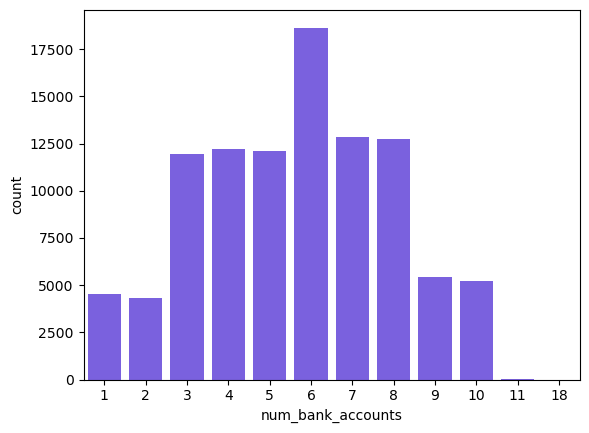

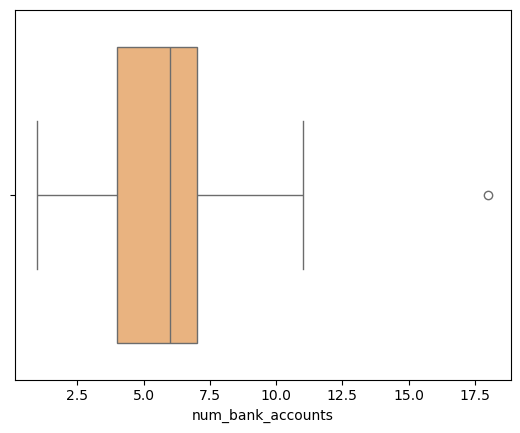

<Figure size 640x480 with 0 Axes>

In [34]:
#check if there are outliers left
#we will use count plot because the column has few number of special variable
sns.countplot(x=df[lst_num[2]],color=np.random.rand(3,))
plt.figure()
sns.boxplot(x=df[lst_num[2]],color=np.random.rand(3,))
plt.figure()

<Figure size 640x480 with 0 Axes>

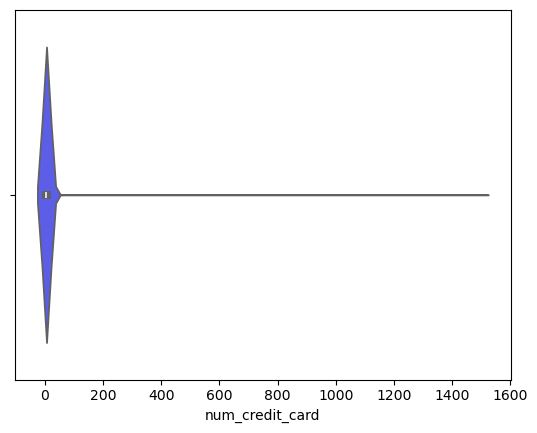

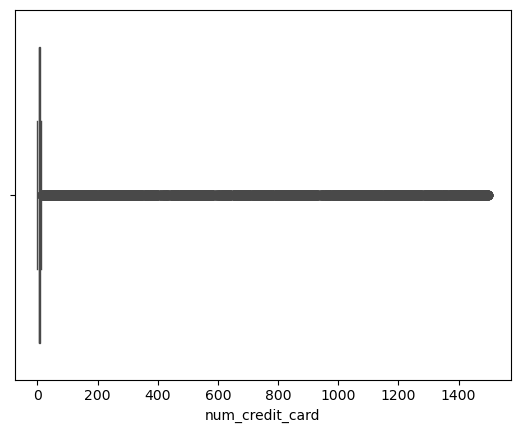

<Figure size 640x480 with 0 Axes>

In [35]:
#num_credit_card column
#we will use violin beacuse too much special varaibles
sns.violinplot(x=df[lst_num[3]],color=np.random.rand(3,))
plt.figure()
sns.boxplot(x=df[lst_num[3]],color=np.random.rand(3,))
plt.figure()

In [36]:
#apply descriptive statistics again
#make range from q1 to q2 (75%)
df['num_credit_card'].describe()

count    100000.00000
mean         22.47443
std         129.05741
min           0.00000
25%           4.00000
50%           5.00000
75%           7.00000
max        1499.00000
Name: num_credit_card, dtype: float64

In [37]:
#handle number of credit card outliers manually for range 1 and 20 otherwise it will replaced with median of age
lst_card=df[(df['num_credit_card'] < 1) | (df['num_credit_card'] > 20)].index
lst_card

Index([   10,    40,   157,   163,   207,   215,   280,   324,   340,   343,
       ...
       99493, 99520, 99592, 99600, 99605, 99611, 99615, 99619, 99769, 99811],
      dtype='int64', length=2276)

In [38]:
for i in lst_card:
    df[lst_num[3]].iloc[i]=df['num_bank_accounts'].median()

<Figure size 640x480 with 0 Axes>

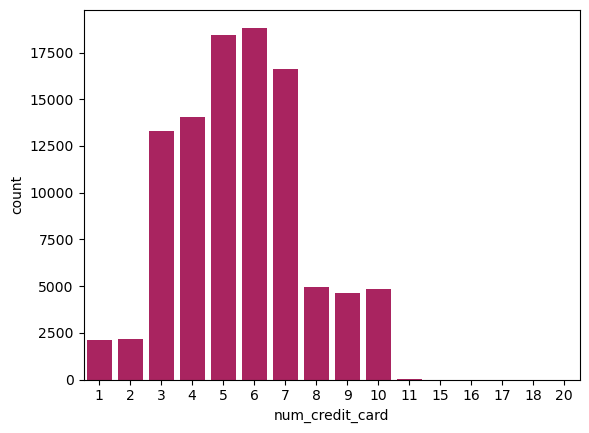

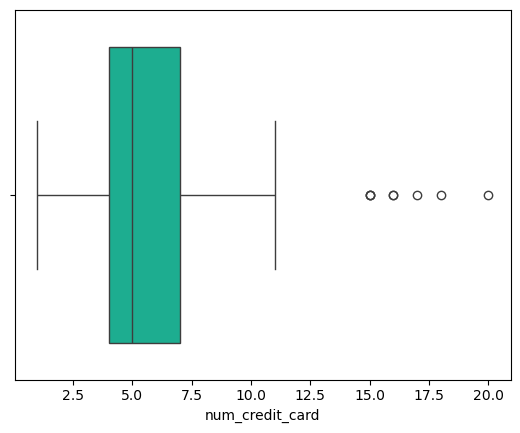

<Figure size 640x480 with 0 Axes>

In [39]:
#check if there are outliers left
#we will use count plot because the column has few number of special variable
sns.countplot(x=df[lst_num[3]],color=np.random.rand(3,))
plt.figure()
sns.boxplot(x=df[lst_num[3]],color=np.random.rand(3,))
plt.figure()

In [40]:
#lets move to the encoding
#collect all categorical features which suppose to be converted into numerical values in encoding phase
lst_obj=df.select_dtypes('O').columns.to_list()
lst_obj

['id',
 'customer_id',
 'name',
 'occupation',
 'type_of_loan',
 'changed_credit_limit']

In [41]:
#discover number of special variables and ordering to figure out the strategy of encoding wether it is (label/onehot/binary) encoding
for i in lst_obj:
    print(f'feature {i} : \n',df[i].value_counts())
    print('-'*60)

feature id : 
 id
0x1602     1
0x19c88    1
0x19caa    1
0x19ca5    1
0x19ca4    1
          ..
0xd94d     1
0xd94c     1
0xd94b     1
0xd94a     1
0x25fed    1
Name: count, Length: 100000, dtype: int64
------------------------------------------------------------
feature customer_id : 
 customer_id
CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: count, Length: 12500, dtype: int64
------------------------------------------------------------
feature name : 
 name
Langep                10029
Stevex                   44
Jessicad                 39
Vaughanl                 39
Deepa Seetharamanm       38
                      ...  
Robin Pomeroyz            4
Matt Scuffhamk            4
Julieno                   4
Bavierq                   4
Timothyl                  3
Name: count, Length: 10139, dtype: int64
---------------------------------------------------

In [42]:
#so our decision will be as follwing
#for name and occupation columns we will use leave one out encoder depends on credit score from preprocessed df
#for the rest of columns we will use the mean of credit score for each column

In [43]:
#lets get credit score first to apply our encoding phase
df_help=pd.read_csv('../data/processed/preprocessed_df.csv')
df_help

Unnamed: 0  age  annual_income  interest_rate  num_of_loan  \
0               0   23        19114.0              3            4   
1               1   23        19114.0              3            4   
2               2   33        19114.0              3            4   
3               3   23        19114.0              3            4   
4               4   23        19114.0              3            4   
...           ...  ...            ...            ...          ...   
99995       99995   25        39628.0              7            2   
99996       99996   25        39628.0              7            2   
99997       99997   25        39628.0             13            2   
99998       99998   25        39628.0              7            2   
99999       99999   25        39628.0              7            2   

       delay_from_due_date  num_of_delayed_payment  num_credit_inquiries  \
0                        3                       7                   4.0   
1                       18                      13                   4.0   
2                        3                       7                   4.0   
3                        5                       4                   4.0   
4                        6                      13                   4.0   
...                    ...                     ...                   ...   
99995                   23                       7                   3.0   
99996                   18                       7                   3.0   
99997                   27                       6                   3.0   
99998                   20                      13                   3.0   
99999                   18                       6                   3.0   

       credit_mix  outstanding_debt  credit_utilization_ratio  \
0               0               809                 26.822620   
1               3               809                 31.944960   
2               3               809                 28.609352   
3               3               809                 31.377862   
4               3               809                 24.797347   
...           ...               ...                       ...   
99995           0               502                 34.663572   
99996           0               502                 40.565631   
99997           3               502                 41.255522   
99998           3               502                 33.638208   
99999           3               502                 34.192463   

       total_emi_per_month  amount_invested_monthly  payment_behaviour  \
0                49.574949                       80                  2   
1                49.574949                      118                  3   
2                49.574949                       81                  1   
3                49.574949                      199                  0   
4                49.574949                       41                  4   
...                    ...                      ...                ...   
99995            35.104023                       60                  5   
99996            35.104023                       54                  4   
99997            35.104023                       24                  5   
99998            35.104023                      251                  3   
99999            35.104023                      167                  0   

       monthly_balance  credit_score  credit_history_year  \
0                  312             2                   22   
1                  284             2                    0   
2                  331             2                   22   
3                  223             2                   22   
4                  341             2                   22   
...                ...           ...                  ...   
99995              479             0                   31   
99996              496             0                   31   
99997              516             0          

In [44]:
#we will use one column only from preprocessed data frame which is credit score

In [45]:
#apply the first type of encoding
#import the desired library
import category_encoders as ce
lst_leave=['name','occupation']
for i in lst_leave :
    df[i]=ce.LeaveOneOutEncoder().fit_transform(df[i],df_help['credit_score'])

In [46]:
#concat df and df_help for the credit score column temporary so that we can apply the second type of encoding
df_temp=pd.concat([df,df_help['credit_score']],axis=1)
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     100000 non-null  object 
 1   customer_id            100000 non-null  object 
 2   month                  100000 non-null  int32  
 3   name                   100000 non-null  float64
 4   ssn                    100000 non-null  int64  
 5   occupation             100000 non-null  float64
 6   num_bank_accounts      100000 non-null  int64  
 7   num_credit_card        100000 non-null  int64  
 8   type_of_loan           100000 non-null  object 
 9   changed_credit_limit   100000 non-null  object 
 10  monthly_inhand_salary  100000 non-null  float64
 11  credit_score           100000 non-null  int64  
dtypes: float64(3), int32(1), int64(4), object(4)
memory usage: 8.8+ MB


In [47]:
#apply the second type of encoding
#import the desired library
lst_rest=['id','customer_id','type_of_loan','changed_credit_limit']
for i in lst_rest :
    mean_feature = df_temp.groupby([i])['credit_score'].mean()
    df[i] = df[i].map(mean_feature)

In [48]:
#check general information about data frame\
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     100000 non-null  float64
 1   customer_id            100000 non-null  float64
 2   month                  100000 non-null  int32  
 3   name                   100000 non-null  float64
 4   ssn                    100000 non-null  int64  
 5   occupation             100000 non-null  float64
 6   num_bank_accounts      100000 non-null  int64  
 7   num_credit_card        100000 non-null  int64  
 8   type_of_loan           100000 non-null  float64
 9   changed_credit_limit   100000 non-null  float64
 10  monthly_inhand_salary  100000 non-null  float64
dtypes: float64(7), int32(1), int64(3)
memory usage: 8.0 MB


In [49]:
#now we need to concat this df with modeling df to re modeling again and upgrade scores

In [50]:
df_model=pd.read_csv('../data/processed/modeling_df.csv')
df=pd.concat([df,df_model],axis=1)
df

id  customer_id  month      name       ssn  occupation  \
0      2.0        1.875      1  2.000000         0    0.872762   
1      2.0        1.875      2  2.000000         0    0.872762   
2      2.0        1.875      3  2.000000         0    0.872762   
3      2.0        1.875      4  2.000000         0    0.872762   
4      2.0        1.875      5  2.000000         0    0.872762   
...    ...          ...    ...       ...       ...         ...   
99995  0.0        0.250      4  0.285714  78735990    0.859112   
99996  0.0        0.250      5  0.285714  78735990    0.859112   
99997  0.0        0.250      6  0.285714  78735990    0.859112   
99998  1.0        0.250      7  0.142857  78735990    0.858952   
99999  0.0        0.250      8  0.285714  78735990    0.859112   

       num_bank_accounts  num_credit_card  type_of_loan  changed_credit_limit  \
0                      3                4         1.875              1.121622   
1                      3                4         1.875              1.121622   
2                      3                4         1.875              0.868962   
3                      3                4         1.875              1.073171   
4                      3                4         1.875              1.121622   
...                  ...              ...           ...                   ...   
99995                  4                6         1.025              0.842520   
99996                  4                6         1.025              0.842520   
99997                  4                6         1.025              0.842520   
99998                  4                6         1.025              0.842520   
99999                  4                6         1.025              0.842520   

       ...  credit_utilization_ratio  total_emi_per_month  \
0      ...                 26.822620            49.574949   
1      ...                 31.944960            49.574949   
2      ...                 28.609352            49.574949   
3      ...                 31.377862            49.574949   
4      ...                 24.797347            49.574949   
...    ...                       ...                  ...   
99995  ...                 34.663572            35.104023   
99996  ...                 40.565631            35.104023   
99997  ...                 41.255522            35.104023   
99998  ...                 33.638208            35.104023   
99999  ...                 34.192463            35.104023   

       amount_invested_monthly  payment_behaviour  monthly_balance  \
0                           80                  2              312   
1                          118                  3              284   
2                           81                  1              331   
3                          199                  0              223   
4                           41                  4              341   
...                        ...                ...              ...   
99995                       60                  5              479   
99996                       54                  4              496   
99997                       24                  5              516   
99998                      251                  3              319   
99999                      167                  0              393   

       credit_score  credit_history_year  credit_history_month    No    Yes  
0                 2                   22                     1  True  False  
1                 2                    0                     0  True  False  
2                 2                   22                     3  True  False  
3                 2                   22                     4  True  False  
4                 2                   22                     5  True  False  
...             ...                  ...                   ...   ...    ...  
99995             0                   31                     6  True  False  
99996             0                   31    

In [51]:
#check general inforamtion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        100000 non-null  float64
 1   customer_id               100000 non-null  float64
 2   month                     100000 non-null  int32  
 3   name                      100000 non-null  float64
 4   ssn                       100000 non-null  int64  
 5   occupation                100000 non-null  float64
 6   num_bank_accounts         100000 non-null  int64  
 7   num_credit_card           100000 non-null  int64  
 8   type_of_loan              100000 non-null  float64
 9   changed_credit_limit      100000 non-null  float64
 10  monthly_inhand_salary     100000 non-null  float64
 11  Unnamed: 0                100000 non-null  int64  
 12  age                       100000 non-null  int64  
 13  annual_income             100000 non-null  fl

In [52]:
#check if there is categoraical columns has been left
lst_obj=[]
for i in df.select_dtypes('O').columns :
    lst_obj.append(i)
if len(lst_obj) == 0 :
    print('there is no categoraical columns has been left')
else :
    print('there is categoraical columns has been left') 

there is no categoraical columns has been left


## conclusion
## after applying more features

## split data to x and y

## apply scaling so that all data has nearby weights whatever its scaling

## most of columns has the gaussian distribution so the best classical classification models to be applied

## Gaussian Naive Bayes , Logistic Regression , SVM , Decision Tress and Random forest

## apply cross validation with and without PCA (diminsionality reduction) to avoid overfitting

## bchoose the best scores and apply hyper tuning to achieve the best performance

## save model with pickle



## split data without PCA

In [53]:
#we wonot have x_train and x_test , y_train and y_test because we will apply it on CV
x=df.drop('credit_score',axis=1)
y=df['credit_score']

## figure out the independent features and the target

In [54]:
x

id  customer_id  month      name       ssn  occupation  \
0      2.0        1.875      1  2.000000         0    0.872762   
1      2.0        1.875      2  2.000000         0    0.872762   
2      2.0        1.875      3  2.000000         0    0.872762   
3      2.0        1.875      4  2.000000         0    0.872762   
4      2.0        1.875      5  2.000000         0    0.872762   
...    ...          ...    ...       ...       ...         ...   
99995  0.0        0.250      4  0.285714  78735990    0.859112   
99996  0.0        0.250      5  0.285714  78735990    0.859112   
99997  0.0        0.250      6  0.285714  78735990    0.859112   
99998  1.0        0.250      7  0.142857  78735990    0.858952   
99999  0.0        0.250      8  0.285714  78735990    0.859112   

       num_bank_accounts  num_credit_card  type_of_loan  changed_credit_limit  \
0                      3                4         1.875              1.121622   
1                      3                4         1.875              1.121622   
2                      3                4         1.875              0.868962   
3                      3                4         1.875              1.073171   
4                      3                4         1.875              1.121622   
...                  ...              ...           ...                   ...   
99995                  4                6         1.025              0.842520   
99996                  4                6         1.025              0.842520   
99997                  4                6         1.025              0.842520   
99998                  4                6         1.025              0.842520   
99999                  4                6         1.025              0.842520   

       ...  outstanding_debt  credit_utilization_ratio  total_emi_per_month  \
0      ...               809                 26.822620            49.574949   
1      ...               809                 31.944960            49.574949   
2      ...               809                 28.609352            49.574949   
3      ...               809                 31.377862            49.574949   
4      ...               809                 24.797347            49.574949   
...    ...               ...                       ...                  ...   
99995  ...               502                 34.663572            35.104023   
99996  ...               502                 40.565631            35.104023   
99997  ...               502                 41.255522            35.104023   
99998  ...               502                 33.638208            35.104023   
99999  ...               502                 34.192463            35.104023   

       amount_invested_monthly  payment_behaviour  monthly_balance  \
0                           80                  2              312   
1                          118                  3              284   
2                           81                  1              331   
3                          199                  0              223   
4                           41                  4              341   
...                        ...                ...              ...   
99995                       60                  5              479   
99996                       54                  4              496   
99997                       24                  5              516   
99998                      251                  3              319   
99999                      167                  0              393   

       credit_history_year  credit_history_month    No    Yes  
0                       22                     1  True  False  
1                        0                     0  True  False  
2                       22                     3  True  False  
3                       22                     4  True  False  
4                       22                     5  True  False  
...                    ...                   ...   ...    ...  
9999

In [55]:
y

0        2
1        2
2        2
3        2
4        2
        ..
99995    0
99996    0
99997    0
99998    1
99999    0
Name: credit_score, Length: 100000, dtype: int64

## check imbalancing classes of the target

<Axes: xlabel='credit_score', ylabel='count'>

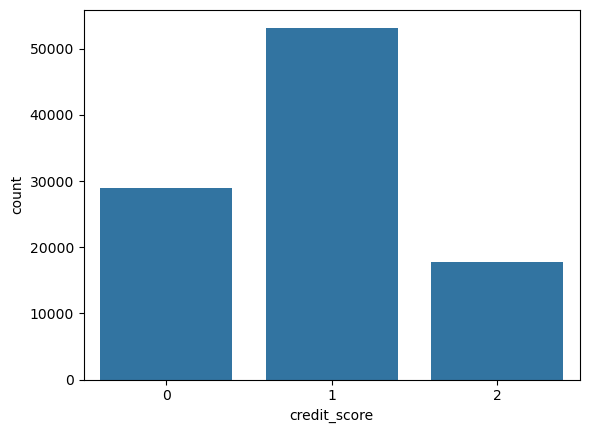

In [56]:
#use count plot
sns.countplot(x=y)

In [57]:
#use pie chart
px.pie(names=y)

In [58]:
#there is imbalancing and we need to handle it
#try with over sampling (smote)
#create smote object
smote = SMOTE()
X, Y = smote.fit_resample(x,y)

In [59]:
#check again with pie chart
#no imbalancing any more
px.pie(names=Y)

## apply techinque without diminsionality reduction (PCA)

## import libarary that generate logistic regression object

In [60]:
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
Models = [
    ('LR',LogisticRegression()),
    ('GNB',GaussianNB()),
    ('DT' , DecisionTreeClassifier())
]

## create pipeline for scaling then  your preferred model

In [61]:
#create stander scaler object
lst_train=[]
lst_test=[]
lst_time=[]
for model in Models :
    pipline=make_pipeline(StandardScaler(),model[1])
    #get average of trian , test and fit time scores
    scores = cross_validate(estimator = pipline , X = x, y = y , cv = 5 , return_train_score=True , scoring='accuracy' )
    print()
    print(f'for model {model[0]} : ')
    avg_train=np.around(scores['train_score'].mean(),2)
    lst_train.append(avg_train)
    print('average train scores : ',avg_train)
    avg_test=np.around(scores['test_score'].mean(),2)
    lst_test.append(avg_test)
    print('average test scores : ',avg_test)
    avg_time=np.around(scores['fit_time'].mean(),2)
    lst_time.append(avg_time)
    print('average fit time : ',avg_time)


for model LR : 
average train scores :  1.0
average test scores :  1.0
average fit time :  0.27

for model GNB : 
average train scores :  1.0
average test scores :  1.0
average fit time :  0.15

for model DT : 
average train scores :  1.0
average test scores :  1.0
average fit time :  0.24


In [62]:
#figure out the last scores
scores

{'fit_time': array([0.28381062, 0.22443223, 0.21694446, 0.22429442, 0.23606157]),
 'score_time': array([0.01513171, 0.02705932, 0.01612449, 0.03310442, 0.0160346 ]),
 'test_score': array([1., 1., 1., 1., 1.]),
 'train_score': array([1., 1., 1., 1., 1.])}

## lets visualize our results here and decide which model is the best depends on scores and time

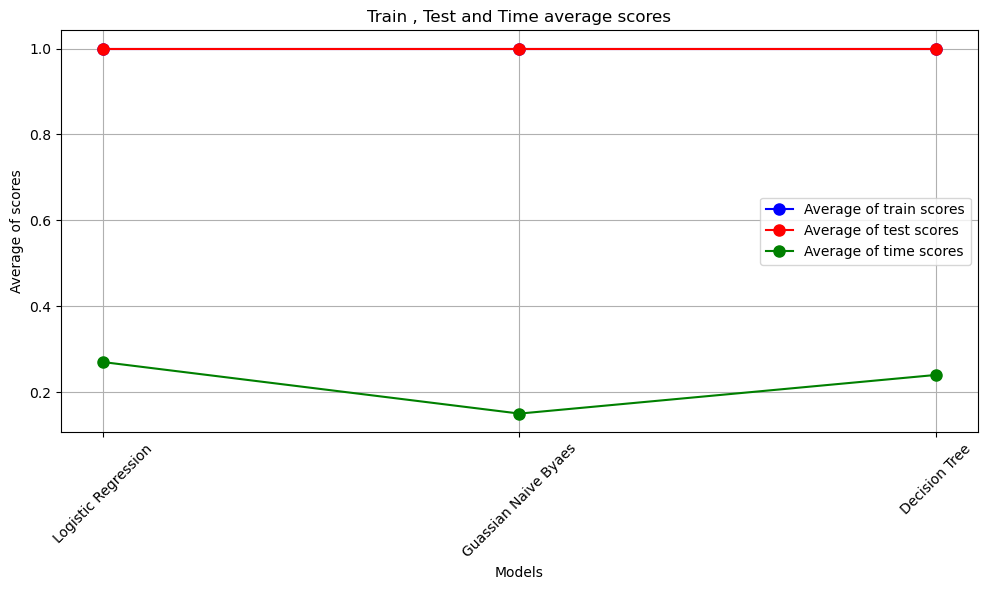

In [63]:
models = ['Logistic Regression', 'Guassian Naive Byaes','Decision Tree']
# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(models, lst_train, marker='o', label='Average of train scores', linestyle='-', color='blue', markersize=8)
plt.plot(models, lst_test, marker='o', label='Average of test scores', linestyle='-', color='red', markersize=8)
plt.plot(models, lst_time, marker='o', label='Average of time scores', linestyle='-', color='green', markersize=8)

#labels , title and legend
plt.xlabel('Models')
plt.ylabel('Average of scores')
plt.title('Train , Test and Time average scores')
plt.legend()
plt.xticks(rotation=45)

#apply grid configurations
plt.grid(True)
plt.tight_layout()
plt.show()

## the best model here depends on average of train , test and time scores  is decision tree so we will use it

## it is the fastest and the most accurate for both traning and test set

## split data and work with balancind data X and Y

In [64]:
x=df.drop(['credit_score','Unnamed: 0'],axis=1)
y=df['credit_score']
#make test size a larger bit
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.5 , random_state=7 , stratify=y)

## figure out the structure of independent variables and the target

In [65]:
x_train

id  customer_id  month      name        ssn  occupation  \
82131  0.0        0.125      4  0.166667  647844933    0.900838   
36780  1.0        1.125      5  1.166667  332274330    0.900696   
11592  0.0        0.125      1  0.166667  411362777    0.886331   
59520  0.0        0.125      1  0.500000   77045427    0.886331   
41364  0.0        0.625      5  0.666667          0    0.873079   
...    ...          ...    ...       ...        ...         ...   
83901  0.0        0.375      6  1.034483  246228674    0.876099   
55248  2.0        1.625      1  1.571429  764304139    0.844582   
6772   1.0        1.000      5  0.538462  435999088    0.914408   
95053  0.0        0.250      6  0.333333          0    0.914452   
11669  1.0        1.000      6  1.000000          0    0.865313   

       num_bank_accounts  num_credit_card  type_of_loan  changed_credit_limit  \
82131                  5                5      0.775000              0.800000   
36780                  3                7      1.125000              1.264706   
11592                  7                5      0.062500              1.000000   
59520                  8                6      0.125000              0.684211   
41364                  6                6      1.230000              0.826531   
...                  ...              ...           ...                   ...   
83901                  3                6      1.159677              1.044118   
55248                  3                7      1.175833              1.180556   
6772                   7                6      1.187500              0.970588   
95053                 10                6      0.250000              0.840909   
11669                  8                4      1.000000              1.250000   

       ...  outstanding_debt  credit_utilization_ratio  total_emi_per_month  \
82131  ...               657                 37.928195            86.029486   
36780  ...               447                 34.303554            18.436787   
11592  ...              1393                 39.939505            58.466462   
59520  ...              2765                 32.000445            73.312147   
41364  ...              2181                 40.011922            20.859987   
...    ...               ...                       ...                  ...   
83901  ...              1275                 38.760931            39.385644   
55248  ...                80                 30.819524            21.491965   
6772   ...                29                 35.515784            56.789642   
95053  ...              4331                 35.618799           202.392912   
11669  ...              1013                 25.792151           406.076936   

       amount_invested_monthly  payment_behaviour  monthly_balance  \
82131                      358                  0              133   
36780                       70                  1              274   
11592                      125                  1              330   
59520                      109                  0              228   
41364                      207                  0              219   
...                        ...                ...              ...   
83901                      120                  5              863   
55248                      197                  0              302   
6772                        51                  5              406   
95053                       49                  4              444   
11669                      354                  4              346   

       credit_history_year  credit_history_month     No    Yes  
82131                   29                    11   True  False  
36780                   26                     8  False   True  
11592                   19                    11  False   True  
59520                   13                    11  False   True  
41364                    8                    11  False   True  
...                    ...                   ...  

In [66]:
x_test

id  customer_id  month      name        ssn  occupation  \
16680  0.0        0.250      1  0.500000          0    0.898384   
23627  0.0        0.375      4  0.142857  955118873    0.886518   
96260  0.0        0.375      5  0.881731  539954727    0.910579   
12093  2.0        1.875      6  0.881532  821342286    0.914249   
52854  1.0        1.000      7  1.000000  227848917    0.886360   
...    ...          ...    ...       ...        ...         ...   
18303  1.0        0.625      8  0.750000  999927186    0.914295   
43905  0.0        0.125      2  0.142857  642533146    0.900838   
58105  0.0        0.000      2  0.000000  501079854    0.914572   
4152   0.0        0.125      1  0.642857          0    0.900838   
35734  2.0        1.875      7  1.857143   88749171    0.844582   

       num_bank_accounts  num_credit_card  type_of_loan  changed_credit_limit  \
16680                  5                5      0.250000              0.868421   
23627                  3                3      0.375000              1.000000   
96260                  5                6      0.312500              0.800000   
12093                  6                1      0.979167              0.988095   
52854                  7                5      1.184783              1.000000   
...                  ...              ...           ...                   ...   
18303                  8                3      1.184783              0.813953   
43905                  3                5      0.885000              0.666667   
58105                 10                5      0.000000              1.013889   
4152                  10                5      0.125000              1.013889   
35734                  4                3      1.687500              0.947368   

       ...  outstanding_debt  credit_utilization_ratio  total_emi_per_month  \
16680  ...              1883                 26.140902           168.923697   
23627  ...              2375                 29.278182          8517.000000   
96260  ...              1679                 36.512679            23.266821   
12093  ...                63                 25.195601            58.411588   
52854  ...               684                 26.936441             0.000000   
...    ...               ...                       ...                  ...   
18303  ...              1290                 39.713934             0.000000   
43905  ...              1909                 32.084217            21.253239   
58105  ...              2156                 29.458206           167.903069   
4152   ...              3285                 30.791809           106.997314   
35734  ...                88                 42.002104           136.886954   

       amount_invested_monthly  payment_behaviour  monthly_balance  \
16680                      215                  0              347   
23627                       40                  4              325   
96260                       58                  1              288   
12093                      103                  2              446   
52854                      290                  0              596   
...                        ...                ...              ...   
18303                       40                  4              451   
43905                      111                  0              287   
58105                      211                  2              227   
4152                       164                  1              281   
35734                      132                  5              629   

       credit_history_year  credit_history_month     No    Yes  
16680                   15                     1  False   True  
23627                   12                    10  False   True  
96260                    8                     7  False   True  
12093                    0                     0   True  False  
52854                   32                     1  False   True  
...                    ...                   ...  

In [67]:
y_train

82131    0
36780    1
11592    0
59520    0
41364    0
        ..
83901    0
55248    2
6772     1
95053    0
11669    1
Name: credit_score, Length: 50000, dtype: int64

In [68]:
y_test

16680    0
23627    0
96260    0
12093    2
52854    1
        ..
18303    1
43905    0
58105    0
4152     0
35734    2
Name: credit_score, Length: 50000, dtype: int64

## check imbalancing classes of the target

<Axes: xlabel='credit_score', ylabel='count'>

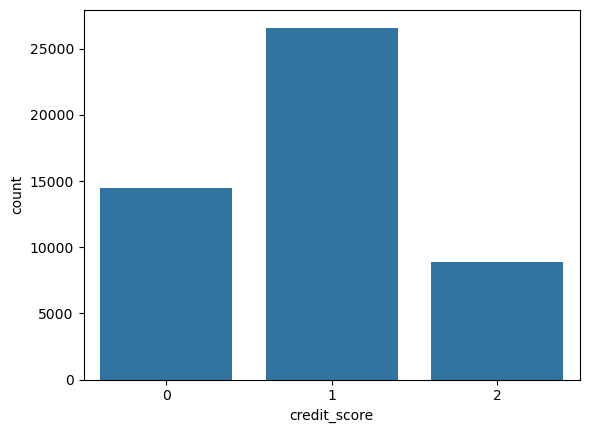

In [69]:
#use count plot
sns.countplot(x=y_train)

In [70]:
#use pie chart
px.pie(names=y_train)

In [71]:
#there is imbalancing and we need to handle it
#try with over sampling (smote) so that we wonot loss any data
#create smote object
smote = SMOTE()
x_train_resample, y_train_resample = smote.fit_resample(x_train,y_train)

In [72]:
#use pie chart again to check the sampling applied technique
px.pie(names=y_train_resample)

## Standarization

## create standard scaler object

In [73]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_resample)
x_test_scaled = scaler.transform(x_test)

## create decision tree classifier object 


In [75]:
#create decision tree classifier object
dt= DecisionTreeClassifier()
#trying to hyper tunining this model manually be changing parameters (max_depth,min_samples_leaf,criterion)
#apply hyper tuning and reach best accuracy
#apply grid seaerch techniue with number of trials
#collect sets of trails
param_grid = [
    {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
]
#create grid search object
from sklearn.model_selection import GridSearchCV
dt_Grid_search=GridSearchCV(dt, param_grid, cv=2, scoring='accuracy')
#fit data
dt_Grid_search.fit(x_train_scaled, y_train_resample)
#get the best score
print('the best scores we got : ',dt_Grid_search.best_score_)
print()
print('the best parameters we got : ',dt_Grid_search.best_params_)
#here we improve our performance for model with 2% which is good

the best scores we got :  1.0

the best parameters we got :  {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5}


## create decision tree classifier object with parameters obtained from hyper tuning (grid search)

In [76]:
#the best parameters we got is criterion = 'gini' , max_depth = 2 and min_samples_leaf = 5
dt= DecisionTreeClassifier(criterion='gini',max_depth=2,min_samples_leaf=5)
dt.fit(x_train_scaled, y_train_resample)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=5)

## predict and show general information (precision,recall,f1 and accuracy scores)

Training set pred score :  100.0 %
Test set  pred score :  100.0 %
classification report of training set : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     26587
           1       1.00      1.00      1.00     26587
           2       1.00      1.00      1.00     26587

    accuracy                           1.00     79761
   macro avg       1.00      1.00      1.00     79761
weighted avg       1.00      1.00      1.00     79761

classification report of test set : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14499
           1       1.00      1.00      1.00     26587
           2       1.00      1.00      1.00      8914

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000

matrix for train : 



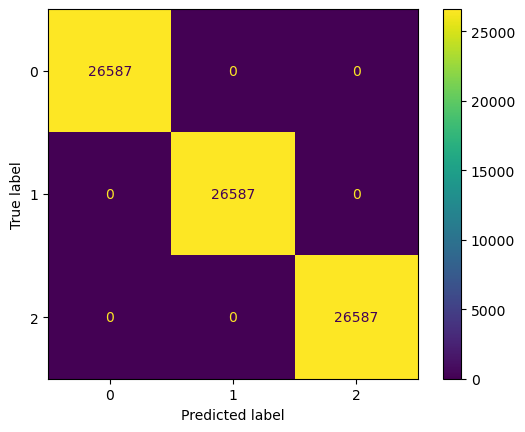

matrix for test : 



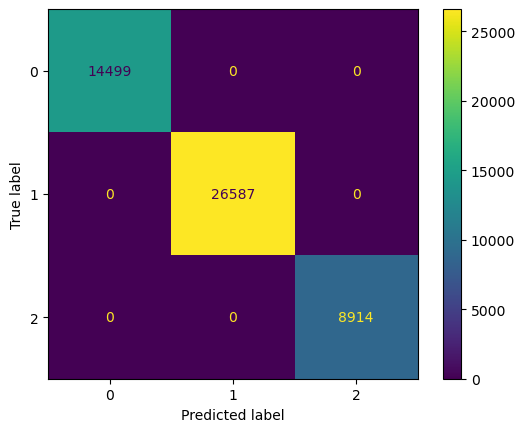

------------------------------


In [77]:
y_train_pred = dt.predict(x_train_scaled)
y_test_pred = dt.predict(x_test_scaled)
print("Training set pred score : ",np.around(accuracy_score(y_true = y_train_resample,y_pred = y_train_pred)* 100,2),'%' )
print("Test set  pred score : ",np.around(accuracy_score(y_true = y_test,y_pred = y_test_pred)* 100,2),'%')
print("classification report of training set : \n",classification_report(y_true = y_train_resample,y_pred = y_train_pred))
print("classification report of test set : \n",classification_report(y_true = y_test,y_pred = y_test_pred))
print('matrix for train : \n')
ConfusionMatrixDisplay(confusion_matrix(y_true=y_train_resample , y_pred=y_train_pred)).plot()
plt.show()
print('matrix for test : \n')
ConfusionMatrixDisplay(confusion_matrix(y_true=y_test , y_pred=y_test_pred)).plot()
plt.show()
print('-'*30)  

## save our model ---> the best model and performance we can get

In [78]:
#we evaluate and choose the best model which is random forest
#save
import pickle
pickle.dump(dt, open('../models/train_model.pkl', 'wb'))

## extract clean version of df and this is final version so we will keep it in the raw sub folder of data main folder

In [79]:
df.to_csv('../data/raw/raw_df.csv')